🚀 STARTING PHASE 5: DATA IMBALANCE HANDLING
Loaded reduced data: (768, 16)

📊 CURRENT CLASS DISTRIBUTION:
• Non-Diabetic (0): 500 cases (65.1%)
• Diabetic (1): 268 cases (34.9%)
• Imbalance Ratio: 0.536
📊 COMPREHENSIVE CLASS IMBALANCE ANALYSIS
🎯 CLASS DISTRIBUTION:
Overall Dataset:
  - Diabetic: 268 cases (34.9%)
  - Non-Diabetic: 500 cases (65.1%)

Training Set (614 samples):
  - Non-Diabetic: 400 cases (65.1%)
  - Diabetic: 214 cases (34.9%)

Test Set (154 samples):
  - Non-Diabetic: 100 cases (64.9%)
  - Diabetic: 54 cases (35.1%)

⚖️ IMBALANCE METRICS:
  - Imbalance Ratio: 0.536
  - Minority Class: 268 samples
  - Majority Class: 500 samples


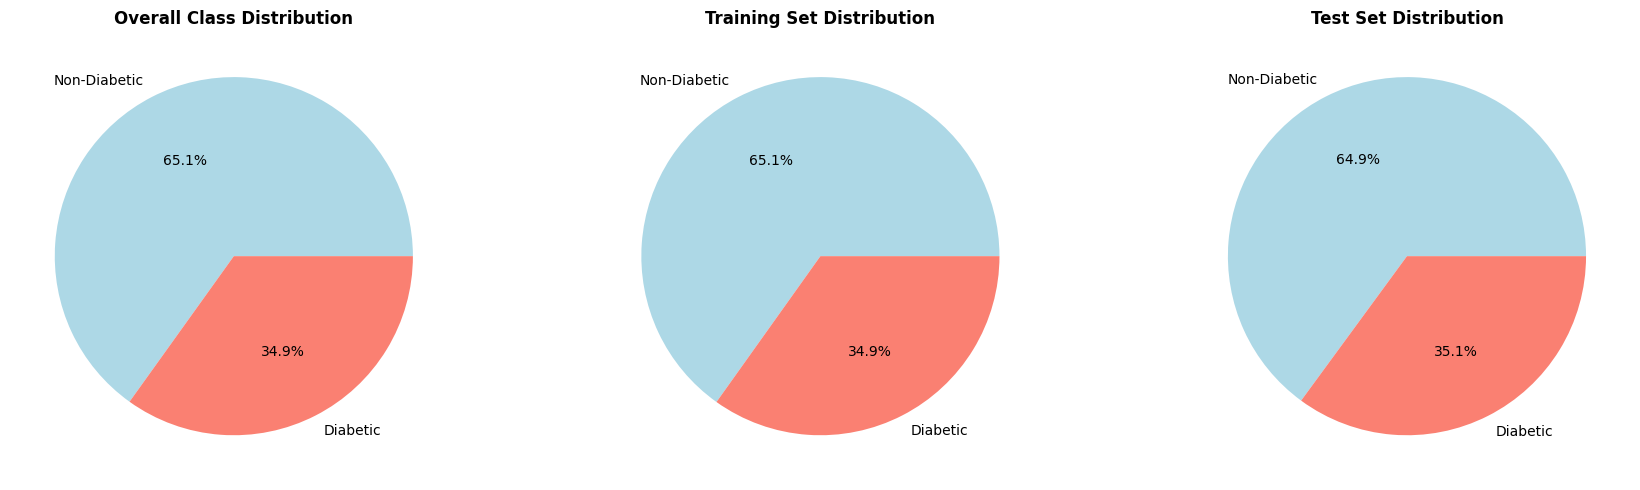


🔍 EVALUATING IMBALANCE IMPACT ON BASELINE MODELS

📈 Random Forest Baseline Performance:
  - Accuracy: 0.747
  - AUC-ROC: 0.832
  - Sensitivity (Diabetic): 0.537
  - Specificity (Non-Diabetic): 0.860
  - Precision (Diabetic): 0.674


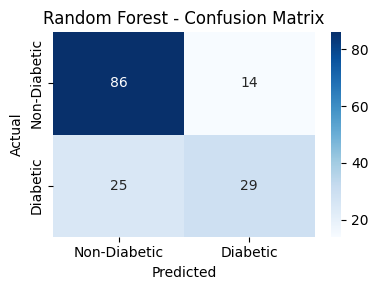


📈 Logistic Regression Baseline Performance:
  - Accuracy: 0.708
  - AUC-ROC: 0.816
  - Sensitivity (Diabetic): 0.519
  - Specificity (Non-Diabetic): 0.810
  - Precision (Diabetic): 0.596


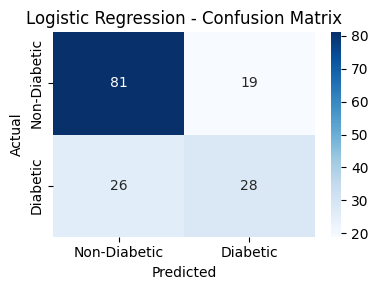


🔄 APPLYING SAMPLING TECHNIQUES FOR IMBALANCE HANDLING

🎯 Original:
  - Resampled distribution: {0: 400, 1: 214}
  - Accuracy: 0.747
  - AUC-ROC: 0.832
  - Sensitivity: 0.537
  - Specificity: 0.860

🎯 Random Oversampling:
  - Resampled distribution: {0: 400, 1: 400}
  - Accuracy: 0.766
  - AUC-ROC: 0.834
  - Sensitivity: 0.704
  - Specificity: 0.800

🎯 Random Undersampling:
  - Resampled distribution: {0: 214, 1: 214}
  - Accuracy: 0.734
  - AUC-ROC: 0.812
  - Sensitivity: 0.722
  - Specificity: 0.740

🎯 SMOTE:
  - Resampled distribution: {0: 400, 1: 400}
  - Accuracy: 0.734
  - AUC-ROC: 0.817
  - Sensitivity: 0.667
  - Specificity: 0.770

🎯 ADASYN:
  - Resampled distribution: {0: 400, 1: 407}
  - Accuracy: 0.740
  - AUC-ROC: 0.818
  - Sensitivity: 0.685
  - Specificity: 0.770

🎯 SMOTE + TomekLinks:
  - Resampled distribution: {0: 368, 1: 368}
  - Accuracy: 0.753
  - AUC-ROC: 0.831
  - Sensitivity: 0.704
  - Specificity: 0.780

🎯 SMOTE + ENN:
  - Resampled distribution: {0: 196, 1: 225

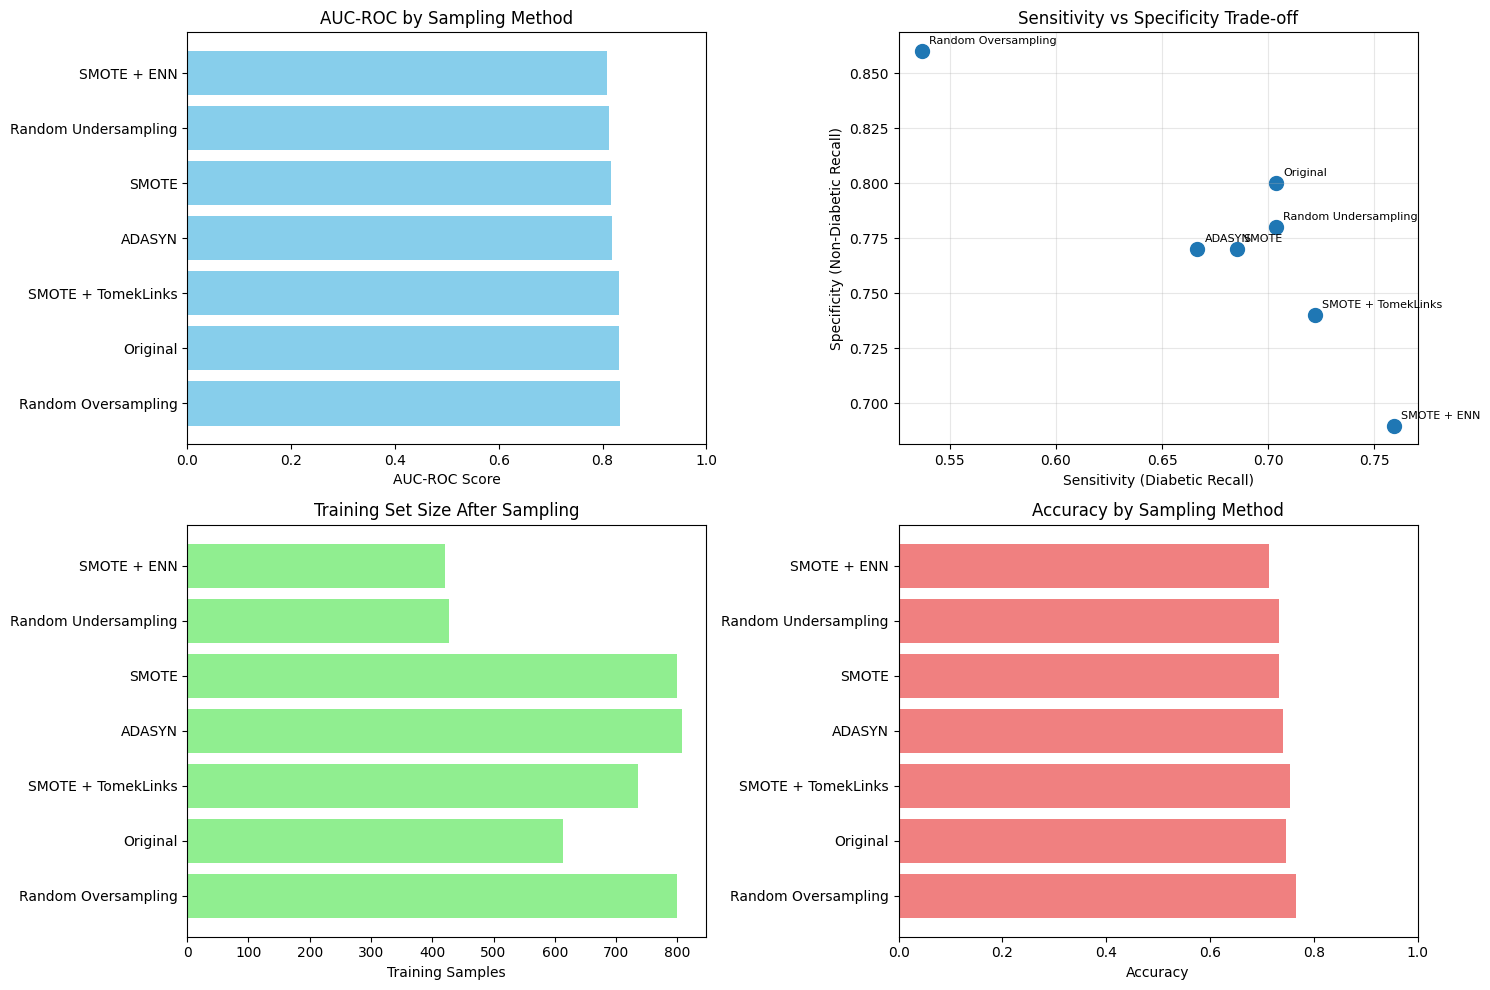


🎯 SELECTING OPTIMAL SAMPLING METHOD
🏆 OPTIMAL METHOD: Random Oversampling
📊 Composite Score: 0.768
📈 Key Metrics:
  - AUC-ROC: 0.834
  - Sensitivity: 0.704
  - Specificity: 0.800
  - Accuracy: 0.766

📦 FINAL BALANCED DATASET:
  - Samples: 800
  - Distribution: {0: 400, 1: 400}

💾 CREATING FINAL BALANCED DATASET
Final Dataset Summary:
📊 Balanced Training Set: (800, 16)
🎯 Test Set: (154, 16)

📈 Final Class Distribution:
Balanced Training:
  - Non-Diabetic: 400 cases (50.0%)
  - Diabetic: 400 cases (50.0%)
Test Set (Original Distribution):
  - Non-Diabetic: 100 cases (64.9%)
  - Diabetic: 54 cases (35.1%)

📋 DATA IMBALANCE HANDLING SUMMARY REPORT
🚀 IMBALANCE HANDLING OPERATIONS PERFORMED:
• Comprehensive class distribution analysis
• Baseline model performance evaluation
• Multiple sampling techniques application
• Optimal method selection
• Final balanced dataset creation

📊 KEY ACHIEVEMENTS:
• Original imbalance ratio: 0.536
• Optimal sampling method: Random Oversampling
• Final traini

In [2]:
# Phase 5: Data Imbalance Handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src')

from data_imbalance import execute_imbalance_handling_pipeline

print("🚀 STARTING PHASE 5: DATA IMBALANCE HANDLING")
print("=" * 50)

# Load the reduced data from Phase 4
df_reduced = pd.read_csv('../data/processed/diabetes_reduced.csv')
print(f"Loaded reduced data: {df_reduced.shape}")

# Display current class distribution
class_dist = df_reduced['Outcome'].value_counts()
print(f"\n📊 CURRENT CLASS DISTRIBUTION:")
print(f"• Non-Diabetic (0): {class_dist[0]} cases ({class_dist[0]/len(df_reduced)*100:.1f}%)")
print(f"• Diabetic (1): {class_dist[1]} cases ({class_dist[1]/len(df_reduced)*100:.1f}%)")
print(f"• Imbalance Ratio: {class_dist[1]/class_dist[0]:.3f}")

# Execute imbalance handling pipeline
balanced_df, test_df, imbalance_report = execute_imbalance_handling_pipeline(
    df_reduced, 
    target_col='Outcome'
)

# Save balanced datasets
balanced_df.to_csv('../data/processed/diabetes_balanced_train.csv', index=False)
test_df.to_csv('../data/processed/diabetes_test.csv', index=False)

print(f"\n💾 Balanced datasets saved:")
print(f"  - Training: ../data/processed/diabetes_balanced_train.csv")
print(f"  - Test: ../data/processed/diabetes_test.csv")

# Save imbalance handling report
import json
with open('../data/processed/imbalance_handling_report.json', 'w') as f:
    # Convert numpy types to Python types for JSON serialization
    json_report = {}
    for key, value in imbalance_report.items():
        if key in ['class_distribution', 'optimal_method']:
            json_report[key] = {}
            for subkey, subvalue in value.items():
                if isinstance(subvalue, (np.int64, np.float64)):
                    json_report[key][subkey] = float(subvalue)
                elif isinstance(subvalue, dict):
                    json_report[key][subkey] = {}
                    for k, v in subvalue.items():
                        if isinstance(v, (np.int64, np.float64)):
                            json_report[key][subkey][k] = float(v)
                        else:
                            json_report[key][subkey][k] = v
                else:
                    json_report[key][subkey] = subvalue
        else:
            json_report[key] = value
    
    json.dump(json_report, f, indent=2, default=str)

print(f"📋 Imbalance handling report saved")

# Final summary
print("\n🎯 PHASE 5 COMPLETION SUMMARY")
print("=" * 40)
print(f"✅ Class imbalance analysis completed")
print(f"✅ Multiple sampling techniques evaluated")
print(f"✅ Optimal method selected: {imbalance_report['optimal_method']['method']}")
print(f"✅ Balanced training dataset created: {balanced_df.shape}")
print(f"✅ Test dataset preserved: {test_df.shape}")

print("\n📈 PERFORMANCE IMPROVEMENT:")
baseline_auc = imbalance_report['baseline_performance']['Random Forest']['auc_roc']
optimal_auc = imbalance_report['sampling_results'][imbalance_report['optimal_method']['method']]['auc_roc']
improvement = optimal_auc - baseline_auc

print(f"• Baseline AUC-ROC: {baseline_auc:.3f}")
print(f"• Optimal Method AUC-ROC: {optimal_auc:.3f}")
print(f"• Improvement: {improvement:+.3f}")

print("\n✅ PHASE 5: DATA IMBALANCE HANDLING COMPLETE!")